
# Sales Data Analysis and Visualization

---

## Overview:

This notebook analyzes customer shopping data to extract insights about sales trends, gender distribution, category distribution, and age group distributions. The analysis includes data cleaning, exploratory data analysis (EDA), and visualization using various Python libraries such as Pandas, Matplotlib, and Seaborn.

---

## Sections:

1. **Importing Libraries**:
    - Import necessary libraries for data manipulation, analysis, and visualization.

2. **Loading and Cleaning Data**:
    - Load the dataset and perform initial data cleaning steps such as dropping unnecessary columns.

3. **Data Inspection**:
    - Display the first few rows of the dataset to understand its structure.
    - Check for data types and missing values.

4. **Duplicate Check**:
    - Check for duplicate rows in the dataset.

5. **Gender Distribution Analysis**:
    - Calculate the distribution of genders in the dataset.
    - Visualize the gender distribution using a pie chart.

6. **Time-Based Sales Analysis**:
    - Convert the `invoice_date` column to datetime format.
    - Group sales data by shopping mall and invoice date.
    - Create time series plots for total sales over time for each shopping mall.

7. **Category Distribution Analysis**:
    - Calculate the distribution of different product categories.
    - Visualize the category distribution using a bar chart.

8. **Gender and Category Analysis**:
    - Analyze the relationship between gender and product categories.
    - Visualize the count of each category for different genders using a count plot.

9. **Age Group Analysis**:
    - Segment customers into different age groups (<30, 30-40, 40-50, >50).
    - Display the segmented customer data.

---


### **1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### **2. Loading and Cleaning Data**

In [2]:
sales_df = pd.read_csv('customer_shopping_data.csv')
sales_df.drop(columns='invoice_no', inplace=True)

### **3. Data Inspection**

In [3]:
sales_df.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


### **4. Duplicate Check**

In [4]:
sales_df.duplicated().sum()

0

### **5. Gender Distribution Analysis**

In [5]:
gender_count = sales_df['gender'].value_counts()
gender_count

gender
Female    59482
Male      39975
Name: count, dtype: int64

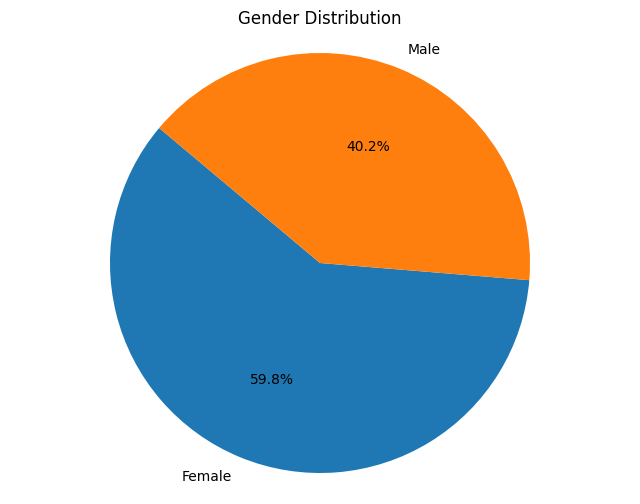

In [6]:
plt.figure(figsize=(8, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

### **6. Time-Based Sales Analysis**

In [7]:
sales_df['invoice_date'] = pd.to_datetime(sales_df['invoice_date'], format='%d/%m/%Y')

In [8]:
df_grouped = sales_df.groupby(['shopping_mall', 'invoice_date']).agg({'price': 'sum'}).reset_index()

In [9]:
df_dict_time_based = {mall: sub_df.drop(columns=['shopping_mall']) for mall, sub_df in df_grouped.groupby('shopping_mall')}

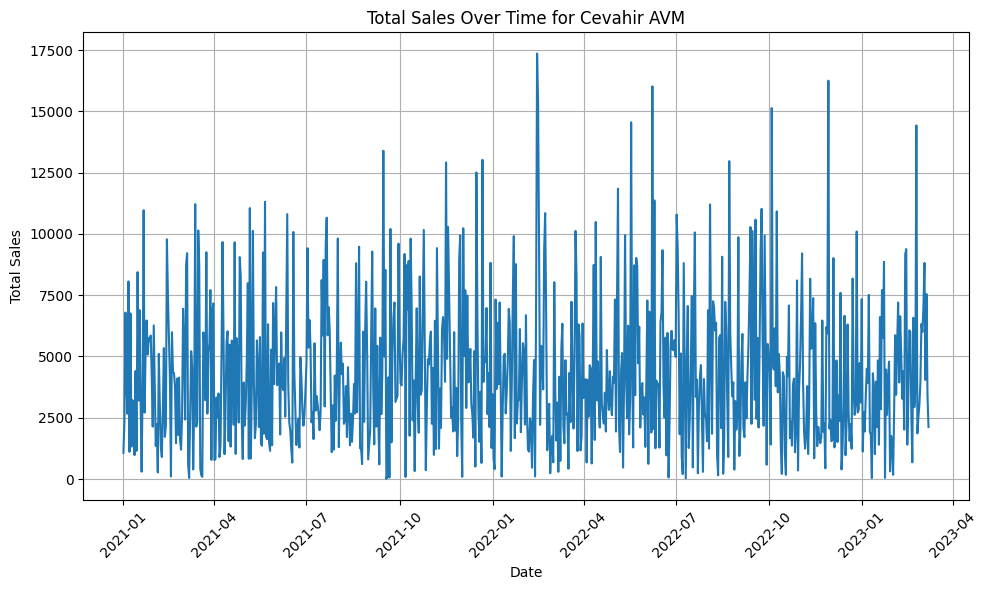

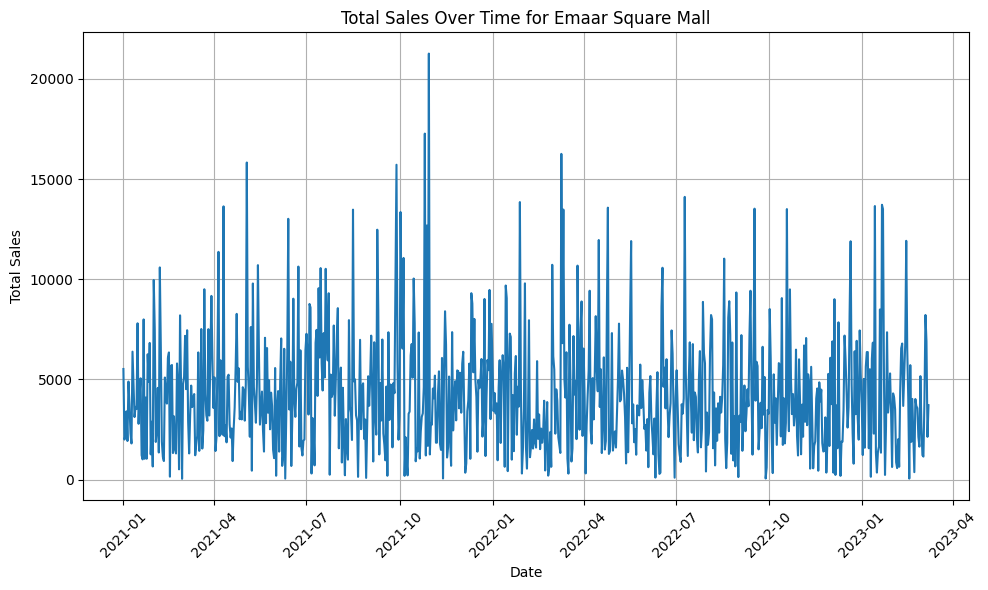

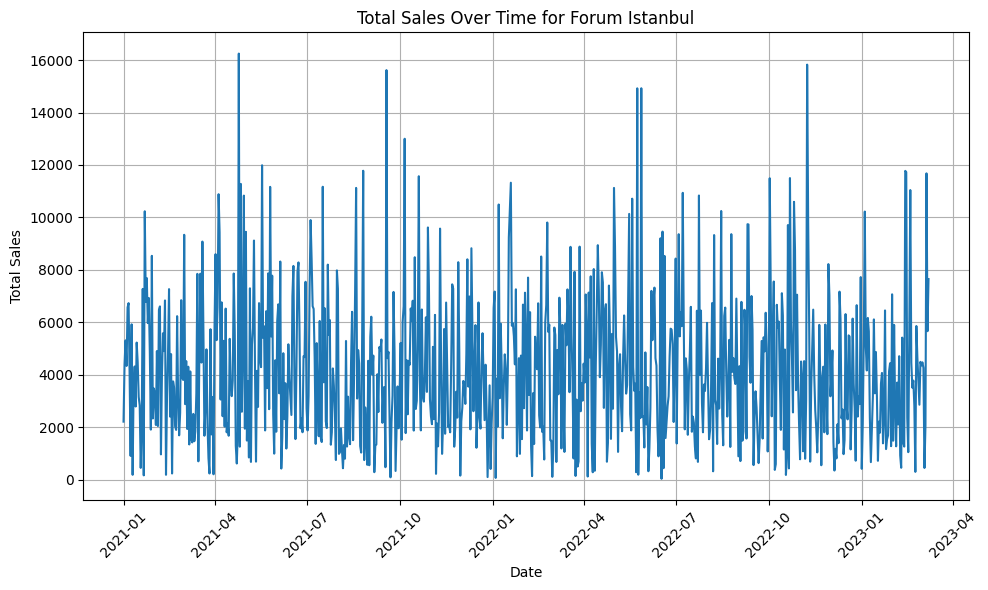

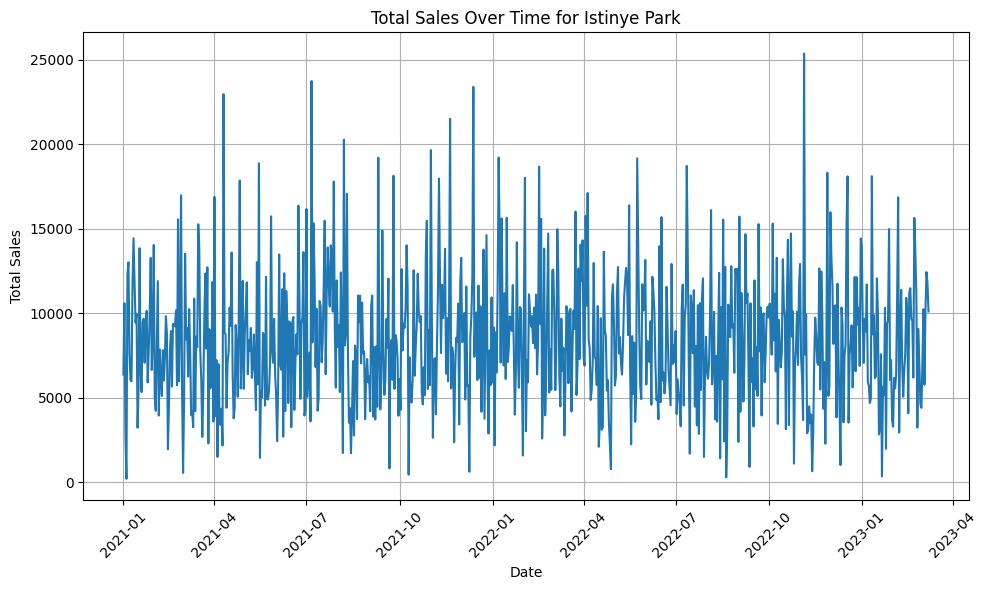

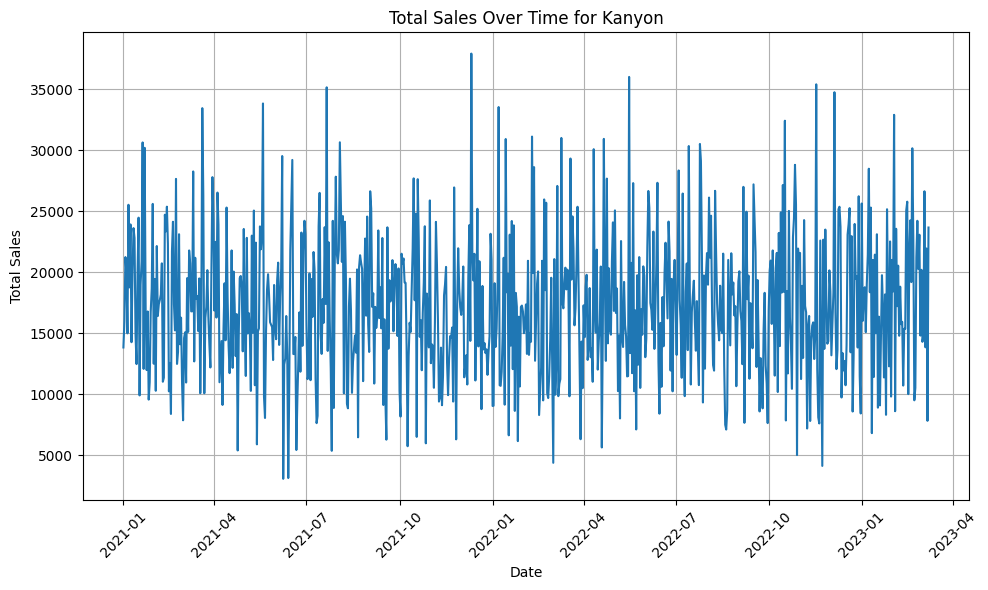

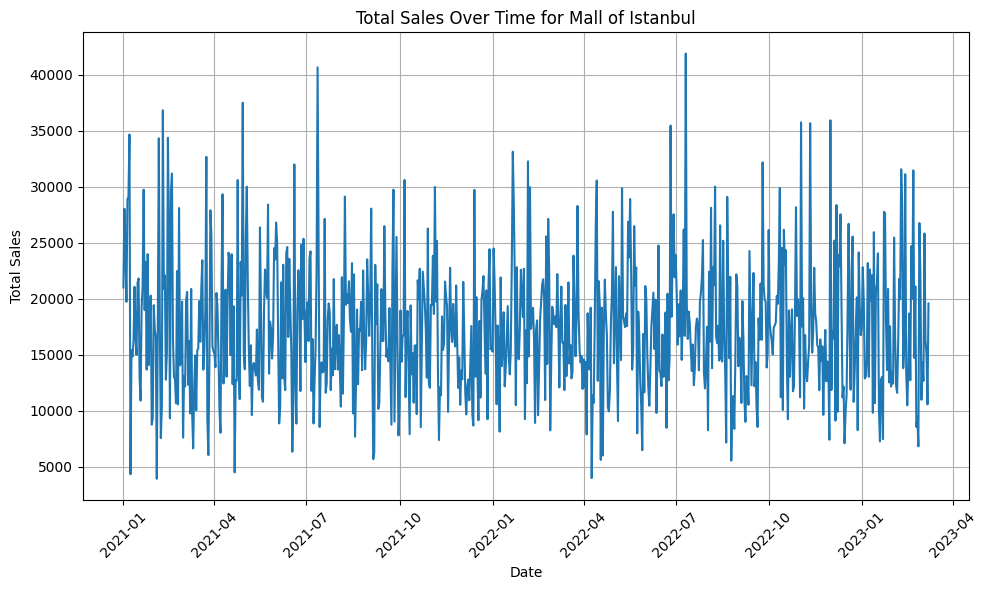

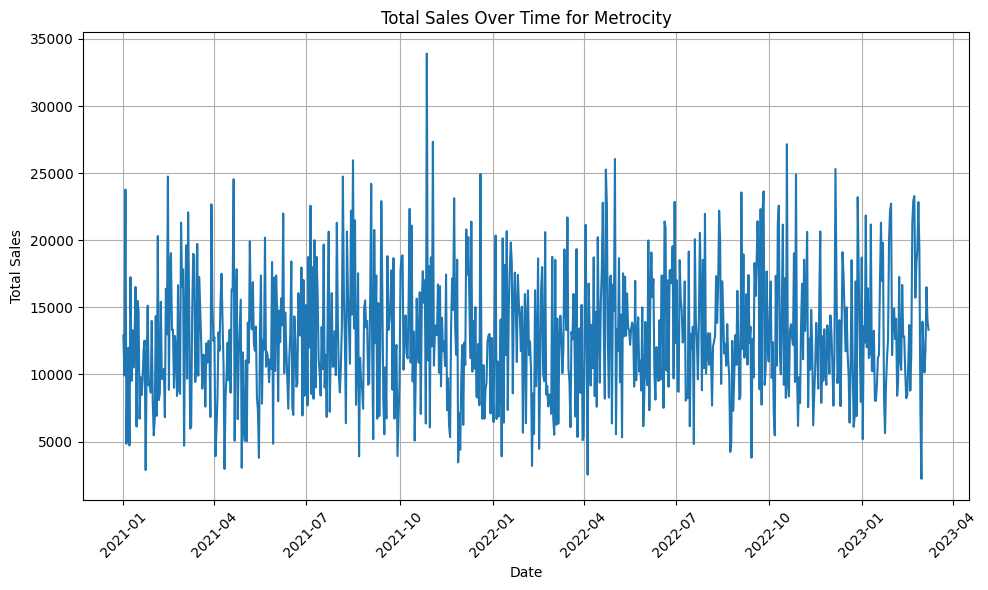

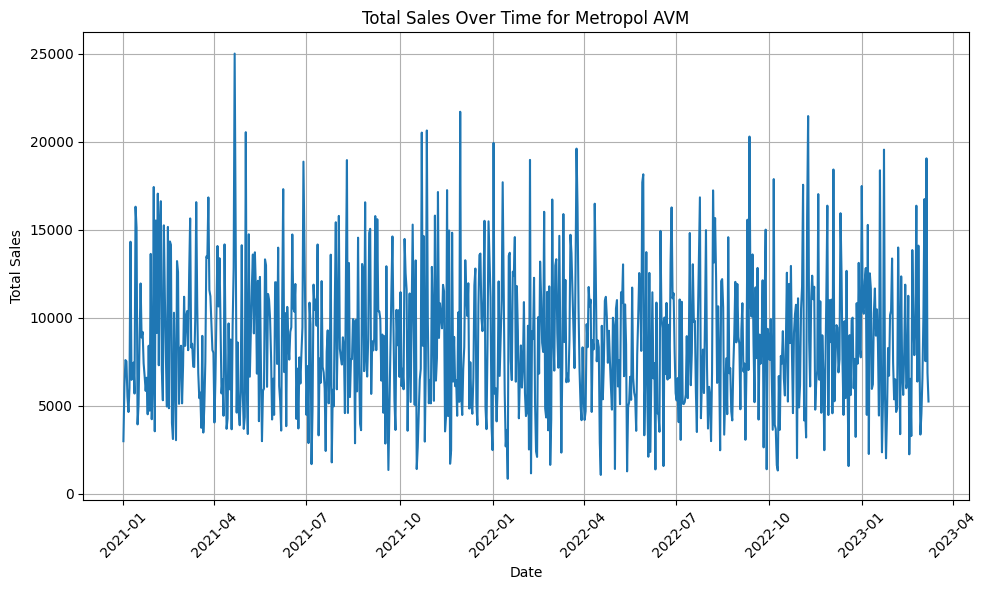

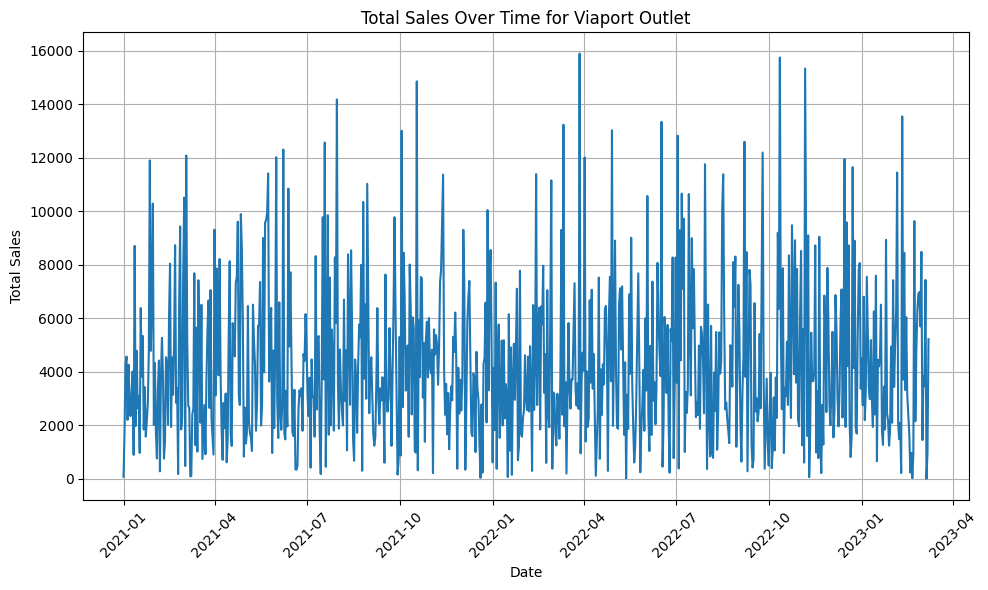

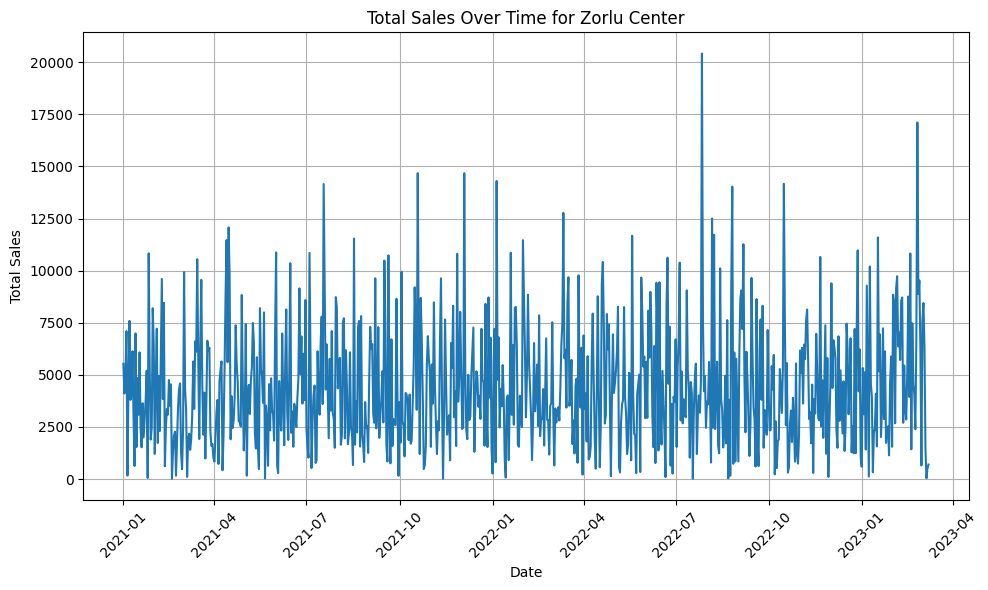

In [10]:
for mall, df in df_dict_time_based.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df['invoice_date'], df['price'])
    plt.title(f'Total Sales Over Time for {mall}')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### **7. Category Distribution Analysis**

In [11]:
category_count = sales_df['category'].value_counts()
category_count

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

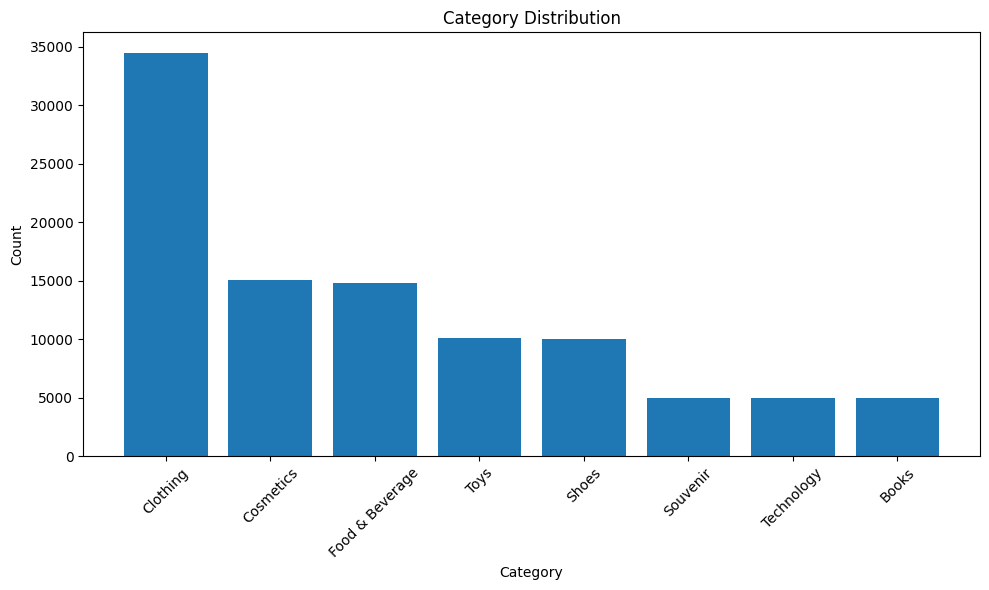

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(category_count.index, category_count.values)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **8. Gender and Category Analysis**

In [13]:
gender_count_per_category = sales_df.groupby(['gender', 'category']).size().unstack()

Text(0.5, 1.0, 'Category count for each gender')

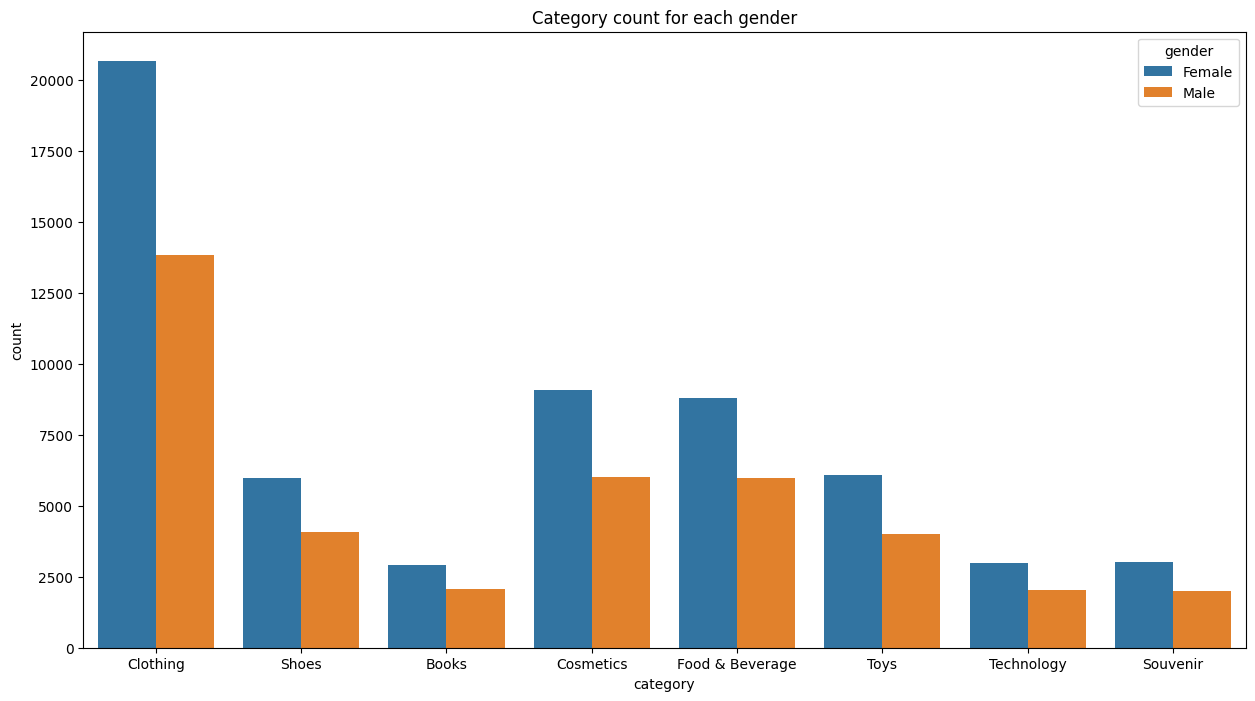

In [14]:
plt.figure(figsize=(15, 8))
sns.countplot(data=sales_df, x=sales_df['category'], hue=sales_df['gender'])
plt.title('Category count for each gender')

### **9. Age Group Analysis**

In [15]:
customer_below_30 = sales_df[sales_df['age'] < 30]
customer_below_30

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
5,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul
11,C191708,Female,29,Books,1,15.15,Credit Card,2022-10-28,Emaar Square Mall
...,...,...,...,...,...,...,...,...,...
99431,C131280,Male,26,Cosmetics,4,162.64,Credit Card,2021-12-28,Mall of Istanbul
99433,C142643,Male,28,Toys,1,35.84,Credit Card,2022-11-02,Metrocity
99444,C119287,Male,24,Toys,1,35.84,Cash,2021-11-26,Mall of Istanbul
99450,C226974,Female,28,Books,1,15.15,Cash,2023-02-28,Zorlu Center


In [16]:
customer_between_30_40 = sales_df[(sales_df['age'] >= 30) & (sales_df['age'] < 40)]
customer_between_30_40

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
7,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul
10,C240286,Female,36,Food & Beverage,2,10.46,Cash,2022-12-25,Metrocity
32,C176727,Female,32,Shoes,3,1800.51,Credit Card,2022-02-23,Kanyon
59,C158837,Female,36,Books,4,60.60,Cash,2021-12-14,Kanyon
61,C716161,Female,33,Clothing,1,300.08,Debit Card,2021-11-26,Kanyon
...,...,...,...,...,...,...,...,...,...
99441,C235554,Male,38,Food & Beverage,4,20.92,Cash,2023-03-02,Zorlu Center
99445,C270290,Female,35,Food & Beverage,5,26.15,Cash,2021-05-07,Kanyon
99446,C107209,Female,32,Food & Beverage,1,5.23,Cash,2023-02-05,Metropol AVM
99447,C288090,Female,37,Toys,3,107.52,Cash,2021-02-21,Metropol AVM


In [17]:
customer_between_40_50 = sales_df[(sales_df['age'] >= 40) & (sales_df['age'] < 50)]
customer_between_40_50

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
6,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park
17,C330667,Female,42,Food & Beverage,3,15.69,Credit Card,2022-01-05,Zorlu Center
18,C218149,Female,46,Clothing,2,600.16,Cash,2021-07-26,Metropol AVM
23,C313348,Male,44,Technology,5,5250.00,Cash,2021-10-26,Kanyon
24,C204553,Female,42,Books,5,75.75,Cash,2022-12-16,Metrocity
...,...,...,...,...,...,...,...,...,...
99432,C289915,Female,41,Books,2,30.30,Debit Card,2022-02-23,Mall of Istanbul
99438,C363191,Female,47,Toys,5,179.20,Credit Card,2021-02-08,Kanyon
99442,C131810,Female,45,Clothing,4,1200.32,Debit Card,2021-02-01,Istinye Park
99443,C223470,Male,41,Cosmetics,4,162.64,Debit Card,2021-07-26,Mall of Istanbul


In [18]:
customer_above_50 = sales_df[sales_df['age'] >= 50]
customer_above_50

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
8,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,Metrocity
9,C283361,Female,60,Clothing,2,600.16,Credit Card,2021-08-22,Kanyon
12,C225330,Female,67,Toys,4,143.36,Debit Card,2022-07-31,Metrocity
...,...,...,...,...,...,...,...,...,...
99448,C231387,Female,65,Shoes,4,2400.68,Credit Card,2021-08-29,Metropol AVM
99449,C953724,Male,65,Clothing,1,300.08,Cash,2023-01-01,Kanyon
99451,C513603,Male,50,Toys,5,179.20,Cash,2021-10-09,Metropol AVM
99454,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
